In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

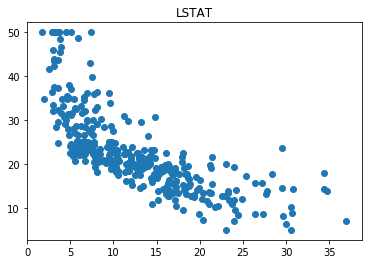

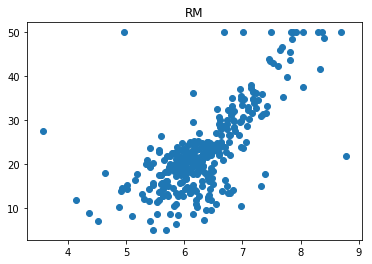

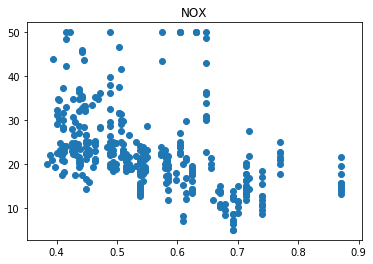

In [4]:
for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [5]:
# set up the grid with parameters to test
param_grid = {'max_depth': [3,4,None]}

In [6]:
# set up the tree within a grid search
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

In [7]:
# train the decision tree
tree_model.fit(X_train[['LSTAT', 'RM', 'NOX']], y_train)

C:\Users\Sole\Anaconda3\envs\feml\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': [3, 4, None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [8]:
# create the new feature

X_train['new_feat'] = tree_model.predict(X_train[['LSTAT', 'RM', 'NOX']])
X_test['new_feat'] = tree_model.predict(X_test[['LSTAT', 'RM', 'NOX']])

Text(0.5, 1.0, 'Tree derived feature vs House Price')

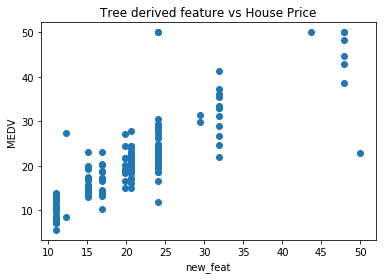

In [9]:
# plot the new feature

plt.scatter(X_test['new_feat'], y_test)
plt.ylabel('MEDV')
plt.xlabel('new_feat')
plt.title('Tree derived feature vs House Price')